## Set Up

In this section, we import necessary python packages to run our code.

Additionally, we use Kaggle Hub to import our arabic sign language dataset.

To succesfully import the data you will need to:


*   Navigate to kaggle.com
*   Click on your profile picture in the right hand side. You will need an account for this.
* Select Settings from the drop down menu, and scroll down until you see "API".
* Create a New Token (figure below). A JSON file will be created.
* When COLAB prompts you to add your kaggle creditials, add the credientals given in the json created above.  

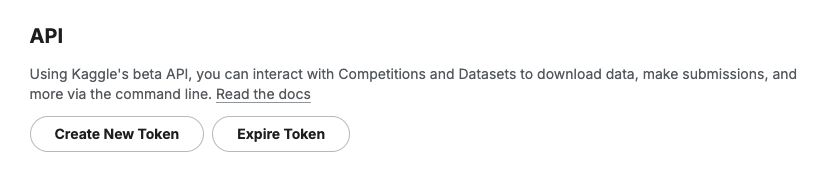



In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


## Import and Inspect the Data

Import the data set.

In [ ]:
dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
print(dataset_path)

/kaggle/input/-spotify-tracks-dataset


Check how the data was imported. It is 1 CSV.

In [ ]:
def count_files(datapath):
    file_count = 0
    for root, dirs, files in os.walk(datapath):
        file_count += len(files)
    return file_count

datapath = dataset_path # Replace with the actual path
num_files = count_files(datapath)
print(f"The number of files in {datapath} is: {num_files}")

The number of files in /kaggle/input/-spotify-tracks-dataset is: 1


Get the mean, count, and percentiles for each feature.

In [ ]:
df = pd.read_csv(dataset_path + "/dataset.csv")

# get initial information
#print(df.head())
print(df.describe())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

In [ ]:
print("Row count: ", df.shape[0])
print("Col count: ", df.shape[1])
print("Col names ", df.columns.tolist())
column_types = df.dtypes
print("Column Types" , column_types)

Row count:  114000
Col count:  21
Col names  ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Column Types Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [ ]:
unique_values = df['track_genre'].unique()
value_counts = df['track_genre'].value_counts()
print("Unique Tracks per genre ", value_counts)

Unique Tracks per genre  track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64


## Handle Missing Data

Looking at all of the columns in the code, there is not a concering amount of missing data in each column, with 0-1 missing values per column.

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


##Explore Data Characteristics

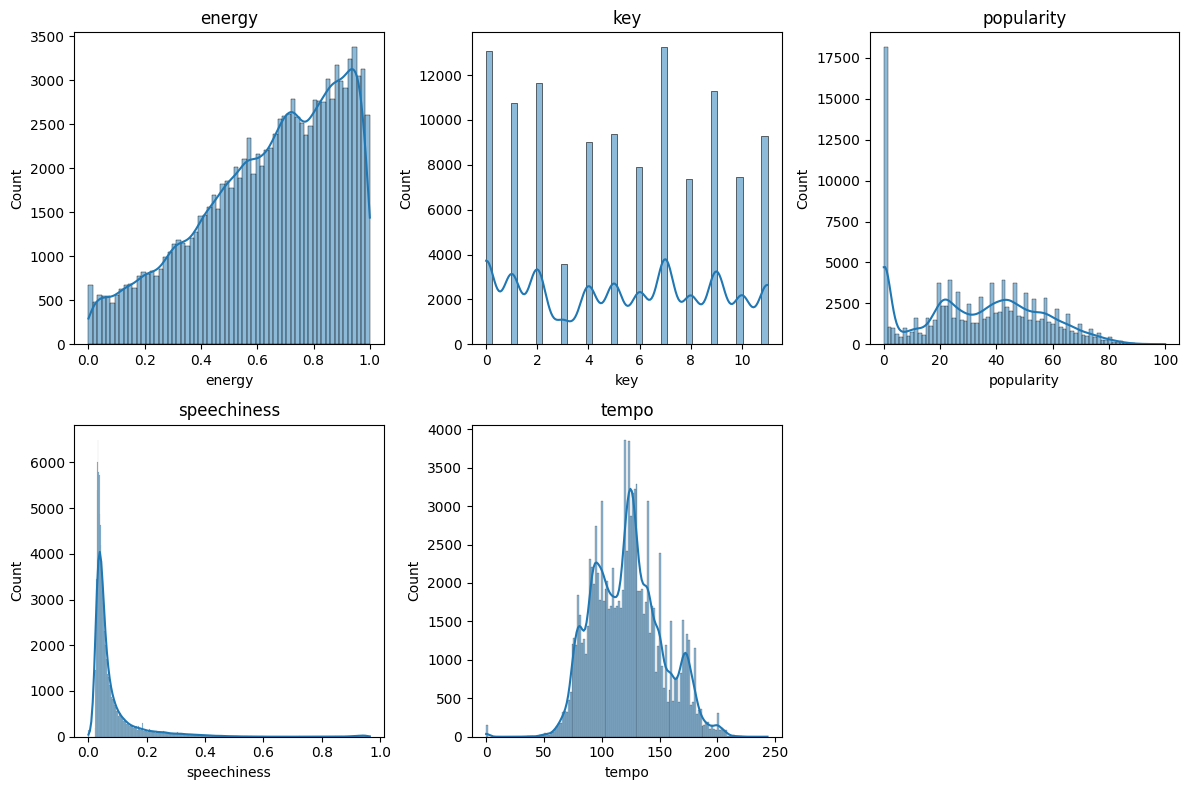


mean:
energy           0.641383
key              5.309140
popularity      33.238535
speechiness      0.084652
tempo          122.147837
dtype: float64 , 
median:
energy           0.6850
key              5.0000
popularity      35.0000
speechiness      0.0489
tempo          122.0170
dtype: float64 , 
std:
 energy          0.251529
key             3.559987
popularity     22.305078
speechiness     0.105732
tempo          29.978197
dtype: float64


In [ ]:
# Plot histograms for some of the features
features_to_plot = ['energy', 'key', 'popularity', 'speechiness', 'tempo']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

The data is skewed to the right for speechiness, as the median is less than the mean. The data is skewed left for energy and popularity, as the mean is less than median. The data is normally distrubted for tempo.

## Perform Data Transformation

Transforming the data using min-max to ensure that the data scales values to between 0 and 1.

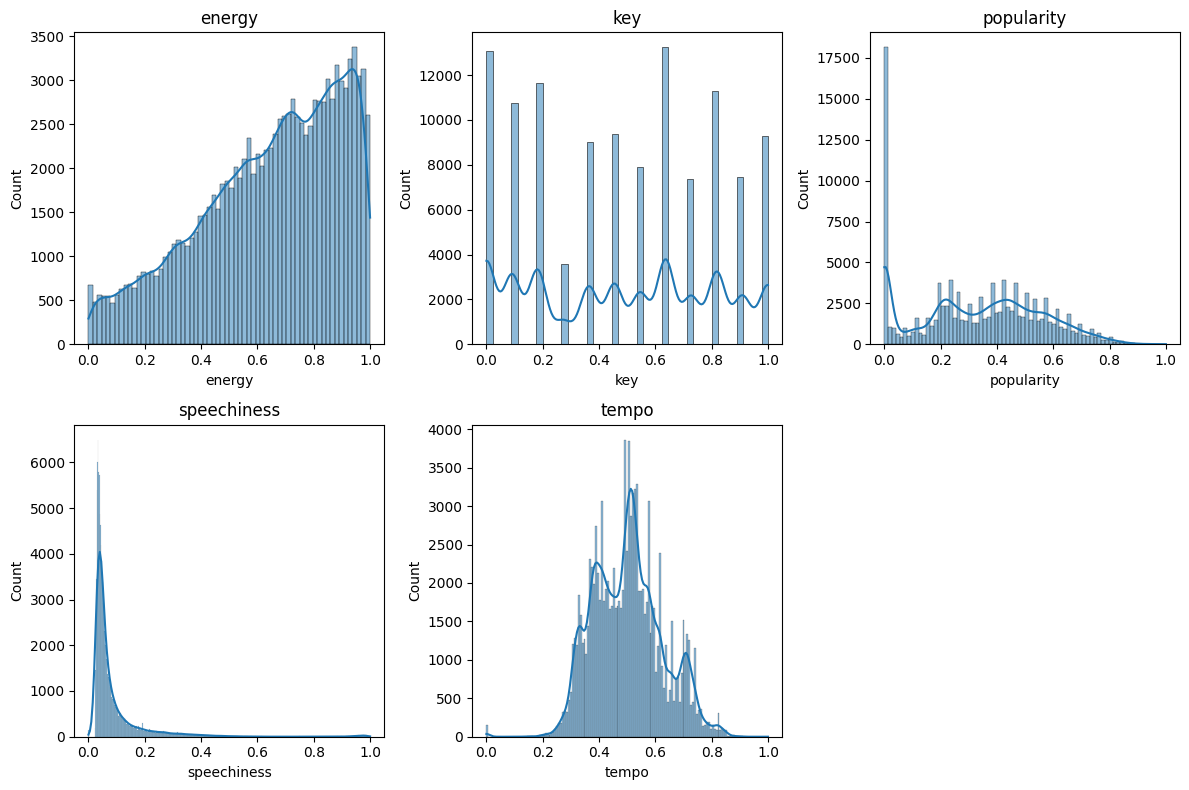


mean:
energy           0.641383
key              5.309140
popularity      33.238535
speechiness      0.084652
tempo          122.147837
dtype: float64 , 
median:
energy           0.6850
key              5.0000
popularity      35.0000
speechiness      0.0489
tempo          122.0170
dtype: float64 , 
std:
 energy          0.251529
key             3.559987
popularity     22.305078
speechiness     0.105732
tempo          29.978197
dtype: float64


In [ ]:
# Plot standarized values for some of the features
mmscaler = MinMaxScaler()
features_to_scale = ['energy', 'key', 'popularity', 'speechiness', 'tempo'] # select the relevant numeric features for scaling
mm_data = mmscaler.fit_transform(df[features_to_scale]) # scale only those features
df_mm_data = pd.DataFrame(mm_data, columns=features_to_scale)
mm_data = mmscaler.fit_transform(df[features_to_scale])
df_mm_data = pd.DataFrame(mm_data, columns=features_to_scale)


features_to_plot = ['energy', 'key', 'popularity', 'speechiness', 'tempo']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_mm_data[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#Correlation Matrix

In [ ]:
numbers_df = df.iloc[:,5:20]
numbers_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


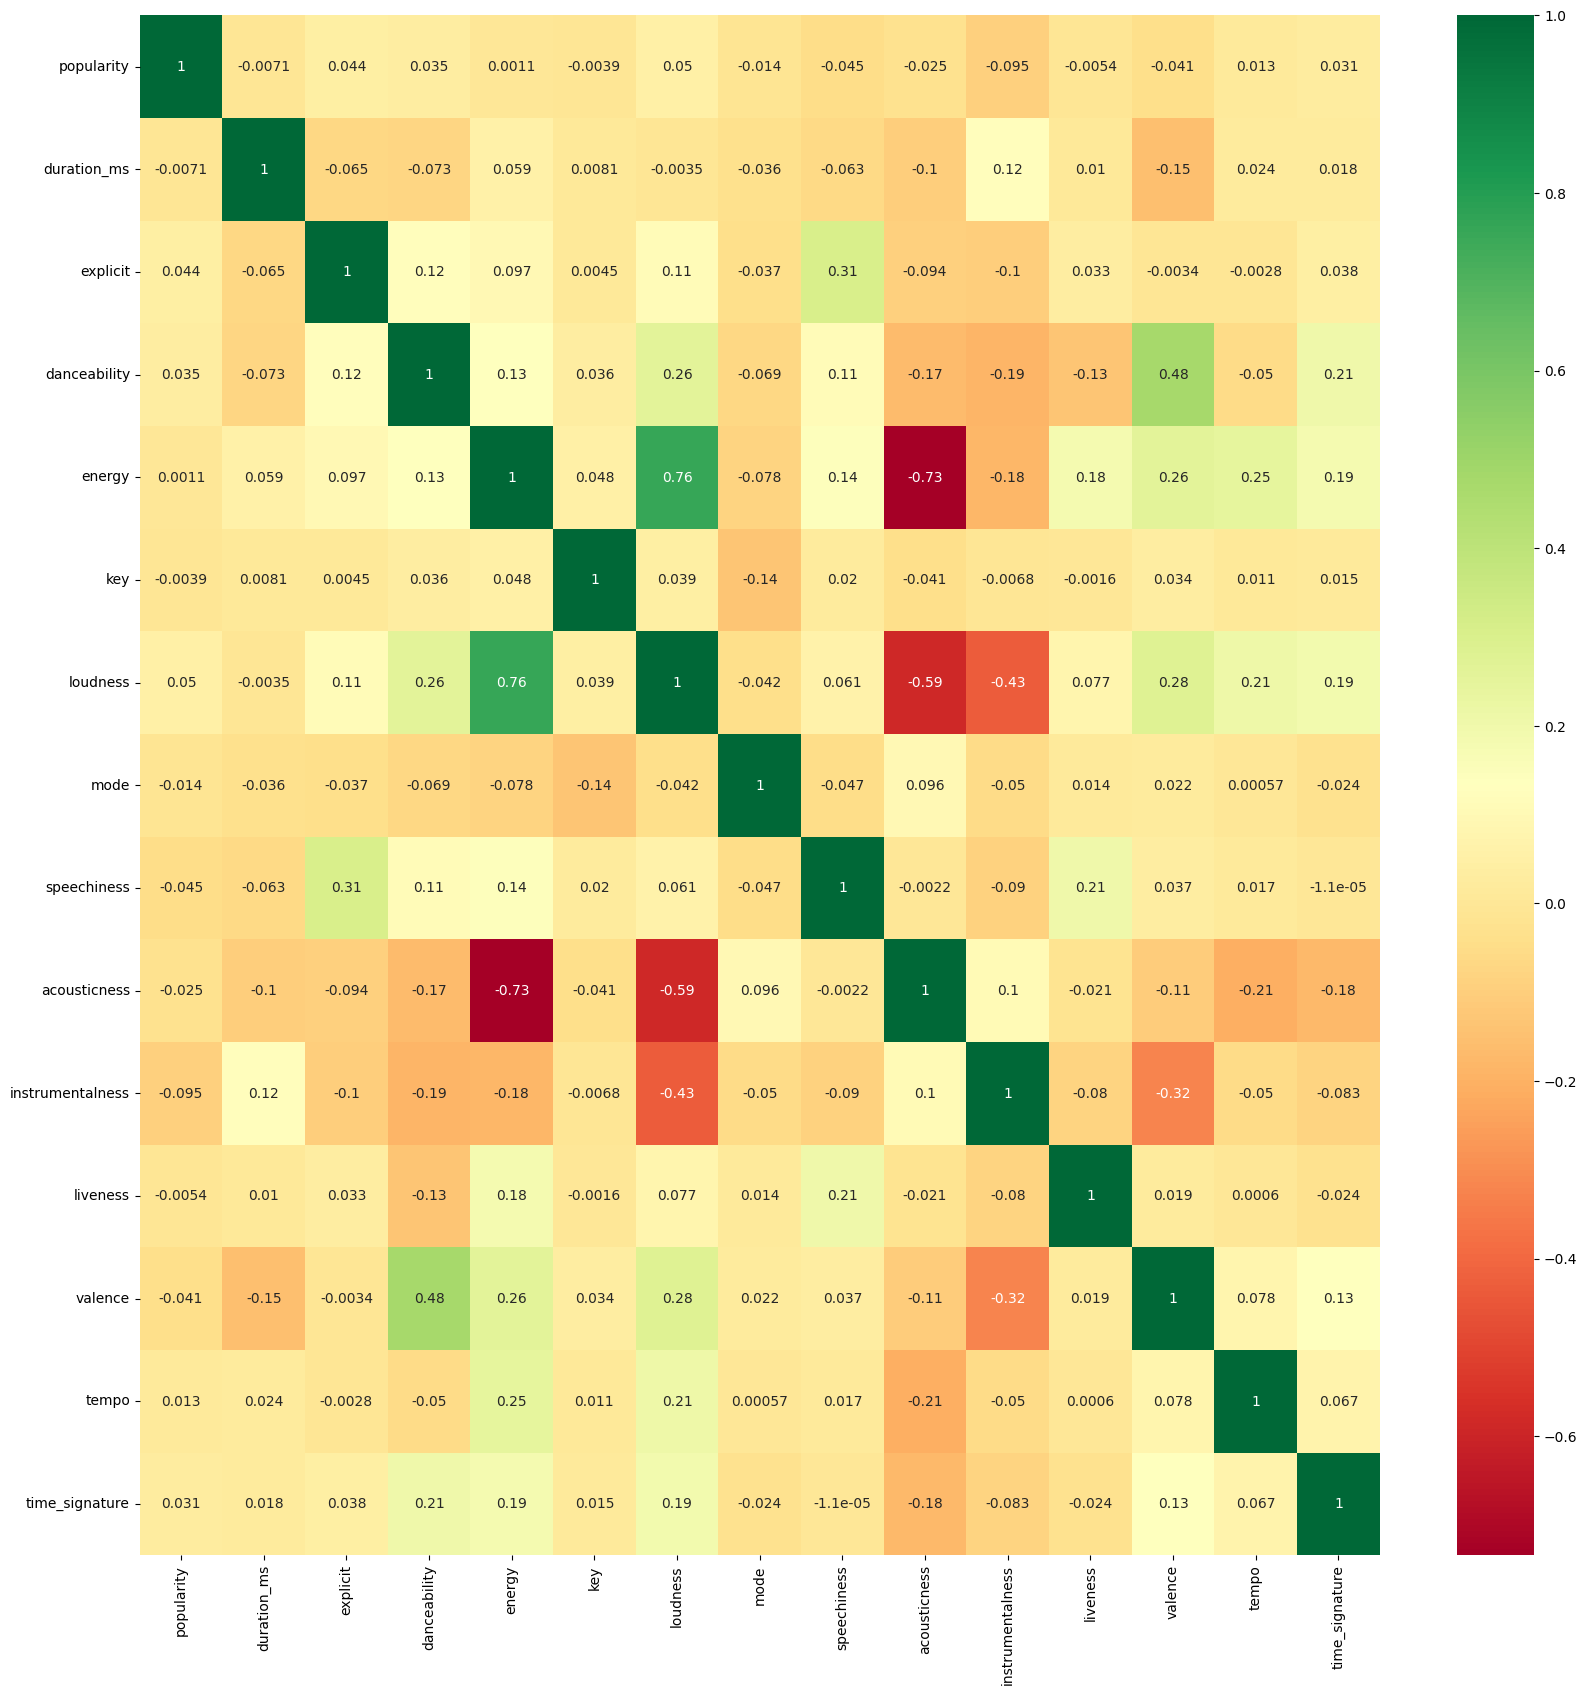

In [ ]:
corrmat = numbers_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(numbers_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Change Categorical Data and Scale all features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]

genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

print("Shape of final dataframe with encoded genres:", df_with_encoded_genres.shape)
print("\nColumns in the final dataframe:")
print(df_with_encoded_genres.columns.tolist())

print("\nFirst few rows of the cleaned dataframe (including track_genre):")
print(df_with_encoded_genres.head())

Shape of final dataframe with encoded genres: (114000, 130)

Columns in the final dataframe:
['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-p

In [ ]:
mmscaler = MinMaxScaler()
mm_datax = mmscaler.fit_transform(df_with_encoded_genres)
df_mm_data = pd.DataFrame(mm_datax, columns=df_with_encoded_genres.columns)
print(df_mm_data.columns.tolist())
df_mm_data.head()

['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'met

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,0.000000,0.73,0.044043,0.0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000009,0.55,0.028566,0.0,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000018,0.57,0.040255,0.0,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000026,0.71,0.038557,0.0,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000035,0.82,0.037969,0.0,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Gradient Boost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

numerical_columns = ['popularity','duration_ms', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'time_signature']

used_feature_columns =['duration_ms', 'danceability', 'energy',
                    'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                      'valence', 'tempo']

genre_columns = df_with_encoded_genres.columns.difference(numerical_columns)
feature_columns = [col for col in used_feature_columns if col != 'popularity']
feature_columns.extend(genre_columns)


X = df_mm_data[feature_columns]
y = df_mm_data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=24)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")



Model Performance Metrics:
Root Mean Squared Error: 0.1858
Mean Absolute Error: 0.1419
R-squared Score: 0.3100


In [ ]:
# Calculate Accuracy
def calculate_accuracy_metrics(y_true, y_pred):
    exact_matches = np.sum(np.round(y_pred) == np.round(y_true)) / len(y_true)

    within_5 = np.sum(abs(y_pred - y_true) <= 5) / len(y_true)

    within_10 = np.sum(abs(y_pred - y_true) <= 10) / len(y_true)

    within_15 = np.sum(abs(y_pred - y_true) <= 15) / len(y_true)

    return exact_matches, within_5, within_10, within_15

exact, acc_5, acc_10, acc_15 = calculate_accuracy_metrics(y_test, y_pred)


print("\nCustom Accuracy Metrics:")
print(f"Exact Match Accuracy (rounded): {exact:.4f}")
print(f"Accuracy within ±5 points: {acc_5:.4f}")
print(f"Accuracy within ±10 points: {acc_10:.4f}")
print(f"Accuracy within ±15 points: {acc_15:.4f}")


Custom Accuracy Metrics:
Exact Match Accuracy (rounded): 0.7795
Accuracy within ±5 points: 1.0000
Accuracy within ±10 points: 1.0000
Accuracy within ±15 points: 1.0000


In [ ]:
# Feature importance analysis

importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': xgb_model.feature_importances_
})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(importance_df.head(10))


Top 10 Features by Importance:
            feature  importance
70          iranian    0.047697
104         romance    0.044845
92         pop-film    0.037953
78            latin    0.037709
26        classical    0.030453
76            k-pop    0.029275
23    chicago-house    0.027748
34   detroit-techno    0.026320
25            chill    0.024911
75             jazz    0.023998


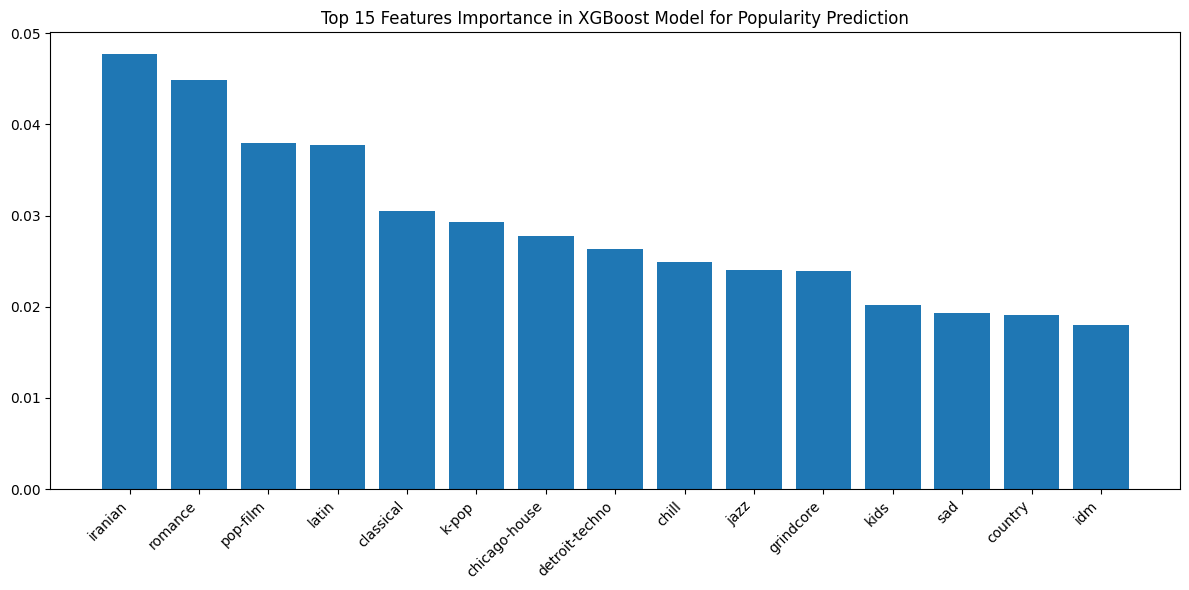

In [ ]:
## Top 15 feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_15_features = importance_df.head(15)
plt.bar(top_15_features['feature'], top_15_features['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Features Importance in XGBoost Model for Popularity Prediction')
plt.tight_layout()
plt.show()

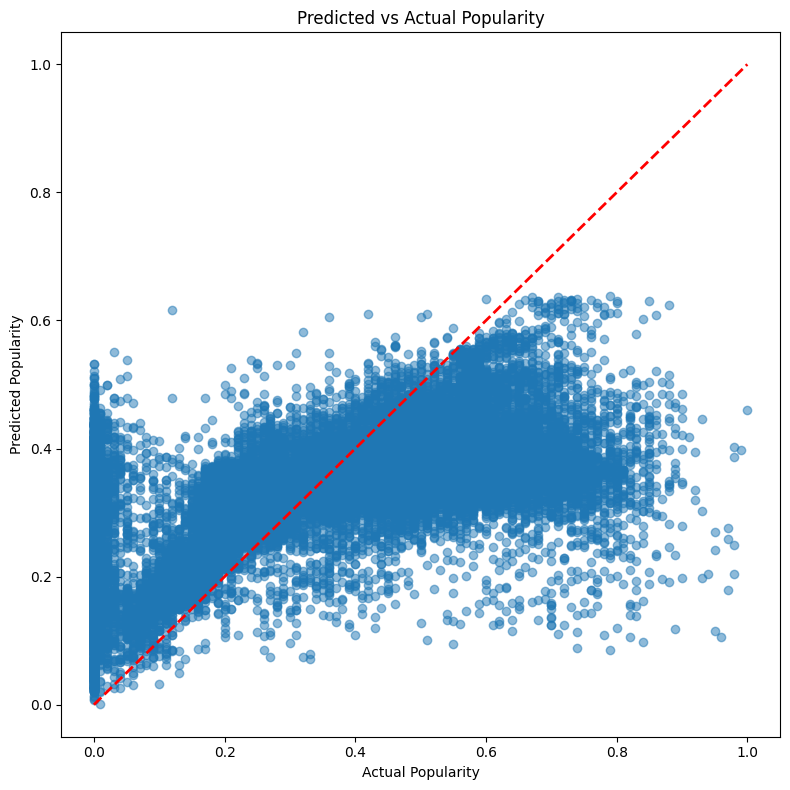

In [ ]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Predicted vs Actual Popularity')
plt.tight_layout()
plt.show()

## Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyper parameters to grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1]
}

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {np.sqrt(-grid_search.best_score_):.4f} (RMSE)")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nTest Set RMSE with best model: {rmse:.4f}")

def calculate_accuracy_metrics(y_true, y_pred):
    exact_matches = np.sum(np.round(y_pred) == np.round(y_true)) / len(y_true)

    within_5 = np.sum(abs(y_pred - y_true) <= 5) / len(y_true)
    within_10 = np.sum(abs(y_pred - y_true) <= 10) / len(y_true)
    within_15 = np.sum(abs(y_pred - y_true) <= 15) / len(y_true)

    return exact_matches, within_5, within_10, within_15

exact, acc_5, acc_10, acc_15 = calculate_accuracy_metrics(y_test, y_pred)

print("\nAccuracy Metrics for Best Model:")
print(f"Exact Match Accuracy (rounded): {exact:.4f}")
print(f"Accuracy within ±5 points: {acc_5:.4f}")
print(f"Accuracy within ±10 points: {acc_10:.4f}")
print(f"Accuracy within ±15 points: {acc_15:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.9}

Best cross-validation score: 0.1651 (RMSE)

Test Set RMSE with best model: 0.1631

Accuracy Metrics for Best Model:
Exact Match Accuracy (rounded): 0.8149
Accuracy within ±5 points: 1.0000
Accuracy within ±10 points: 1.0000
Accuracy within ±15 points: 1.0000
